Import the Libraries

In [148]:
import act
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


Download Distrometer and Microwave Radiometer data for selected date

In [171]:
username="asdf"
token="asdfffff"
# Set the datastream and start/enddates
datastream = 'cormwrlosM1.b1'      #MWR
datastream_disdro ='corldM1.b1'    #DISDRO
startdate = '2019-01-29'
enddate = '2019-01-29'

result1 = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
result2 = act.discovery.download_arm_data(username, token, datastream_disdro, startdate, enddate)

[DOWNLOADING] cormwrlosM1.b1.20190129.000001.cdf

If you use these data to prepare a publication, please cite:

Cadeddu, M., & Tuftedal, M. Microwave Radiometer (MWRLOS). Atmospheric Radiation
Measurement (ARM) User Facility. https://doi.org/10.5439/1999490

[DOWNLOADING] corldM1.b1.20190129.000000.cdf

If you use these data to prepare a publication, please cite:

Wang, D., Bartholomew, M. J., Zhu, Z., & Shi, Y. Laser Disdrometer (LD).
Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1973058



Finding the time of actual thunderstorm using Disdrometer.
Plotting rain intensity

In [172]:
ds2=xr.open_dataset("/corldM1.b1/corldM1.b1.20190129.000000.cdf")

(0.0, 100.0)

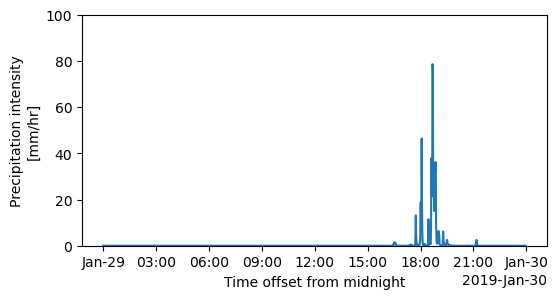

In [173]:
fig = plt.figure(figsize=(6, 3))
ds2.precip_rate.plot()
plt.ylim(0,100)

The variations of LWC and Vapor using MWR

In [174]:
ds=xr.open_dataset("/cormwrlosM1.b1/cormwrlosM1.b1.20190129.000001.cdf")

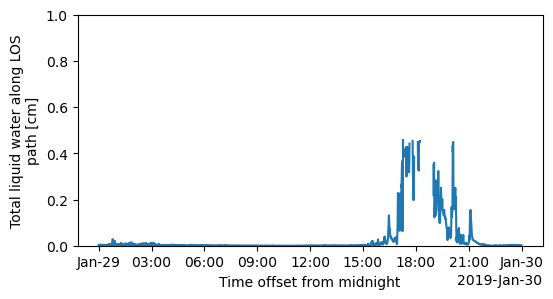

In [175]:
qc_liq=ds.qc_liq
qc_liq=qc_liq.where(qc_liq>0)
fig = plt.figure(figsize=(6, 3))
plt.ylim(0,1)
#plt.title("LWC")
ds.liq.plot()

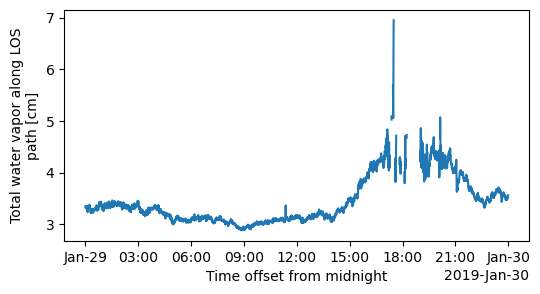

In [176]:
fig = plt.figure(figsize=(6, 3))
ds.vap.plot()

Radar Reflectivity from disdrometer

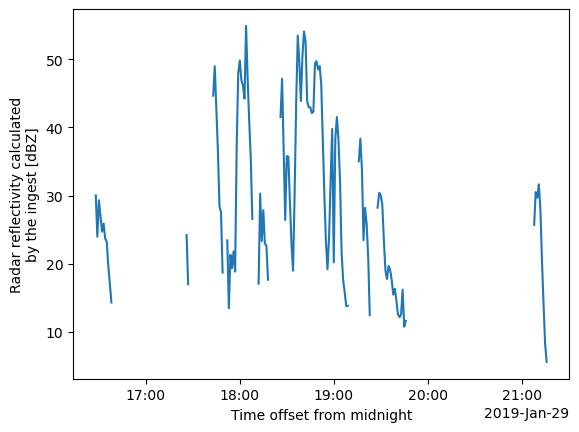

In [177]:


ds2.equivalent_radar_reflectivity.plot()

In [134]:
#ds2.diameter_max.plot()

In [123]:
dsd=ds2.number_density_drops

In [124]:
dsd1

<xarray.DataArray 'number_density_drops' (time: 46, particle_size: 32)> Size: 6kB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,  73.10543 , ...,        nan,        nan,
               nan],
       [       nan,        nan, 127.9345  , ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan, 146.21086 , ...,        nan,        nan,
               nan],
       [       nan,        nan,  36.552715, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * time           (time) datetime64[ns] 368B 2019-01-29T18:25:00 ... 2019-01...
  * particle_size  (particle_size) float32 128B 0.062 0.187 0.312 ... 21.5 24.0
Attributes:
    long_name:  Number density of drops of the diameter corresponding to a pa...
    units:      1/(m^3 mm)

In [125]:
dsd1=dsd.sel(
    time=slice('2019-01-29T18:25:00', '2019-01-29T19:10:00'))

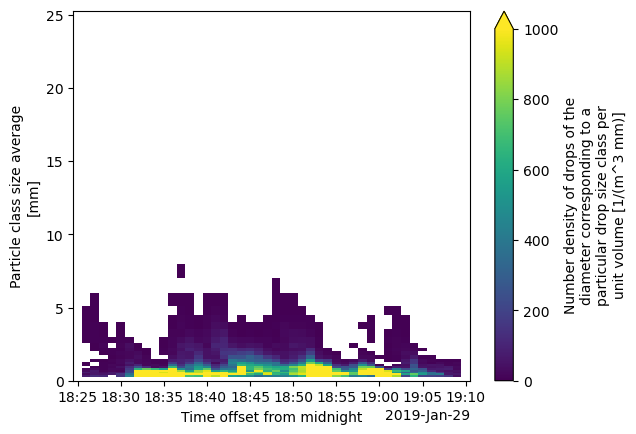

In [126]:
dsd1=dsd1.where(dsd1>0)
dsd1.plot(x="time",y="particle_size",vmin=0,vmax=1000)

In [127]:
dsd1.to_dataframe().to_csv("dsd.csv")

In [128]:
.number_density_drops.

SyntaxError: invalid syntax (931908813.py, line 1)